In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import hist_frame
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [3]:
pcos_dataset = pd.read_csv('pcos_dataset.csv')
pcos_dataset

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0
...,...,...,...,...,...,...
995,34,18.4,1,95.7,23,0
996,45,28.9,1,28.5,7,0
997,37,28.3,0,32.4,28,0
998,41,27.3,0,95.6,9,0


In [4]:
# divide dataset into two parts: one for training and the other one for testing
pcos_train_set, pcos_test_set = train_test_split(pcos_dataset, test_size=0.2, random_state=42)

pcos = pcos_train_set.drop('PCOS_Diagnosis', axis=1)
print(pcos)
pcos_labels = pcos_train_set['PCOS_Diagnosis'].copy()
print(pcos_labels)


     Age   BMI  Menstrual_Irregularity  Testosterone_Level(ng/dL)  \
29    43  18.7                       1                       31.3   
535   43  19.6                       0                       48.8   
695   36  22.1                       0                       23.5   
557   39  26.2                       1                       96.1   
836   33  20.1                       1                       87.9   
..   ...   ...                     ...                        ...   
106   38  22.8                       1                       81.3   
270   28  30.7                       0                       93.1   
860   26  19.6                       1                       68.1   
435   27  21.1                       0                       21.5   
102   33  29.4                       1                       44.3   

     Antral_Follicle_Count  
29                      22  
535                      6  
695                      8  
557                     28  
836                     18

In [5]:
print('Check for missing values:')
pcos_dataset.isnull().any()

Check for missing values:


Age                          False
BMI                          False
Menstrual_Irregularity       False
Testosterone_Level(ng/dL)    False
Antral_Follicle_Count        False
PCOS_Diagnosis               False
dtype: bool

In [6]:
print('Check for duplicated values: ')
pcos_dataset.duplicated().any()

Check for duplicated values: 


np.False_

In [7]:
print('Check for unusual values: \n')
pcos_dataset.info()

Check for unusual values: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   BMI                        1000 non-null   float64
 2   Menstrual_Irregularity     1000 non-null   int64  
 3   Testosterone_Level(ng/dL)  1000 non-null   float64
 4   Antral_Follicle_Count      1000 non-null   int64  
 5   PCOS_Diagnosis             1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


In [8]:
features = ['Age', 'BMI', 'Menstrual_Irregularity', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count']

X = pcos_dataset[features]
target = pcos_dataset['PCOS_Diagnosis']

array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Menstrual_Irregularity'}>,
        <Axes: title={'center': 'Testosterone_Level(ng/dL)'}>],
       [<Axes: title={'center': 'Antral_Follicle_Count'}>, <Axes: >]],
      dtype=object)

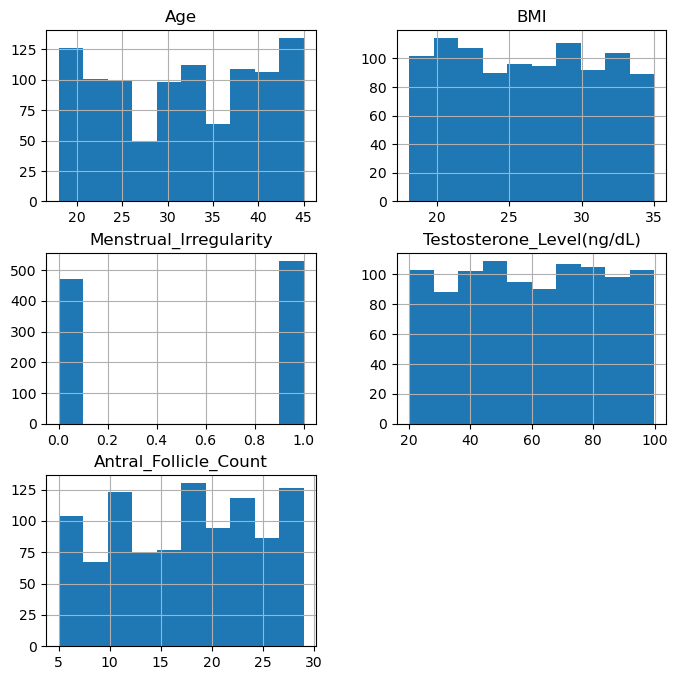

In [9]:
hist_frame(pcos_dataset[features], figsize=[8,8])

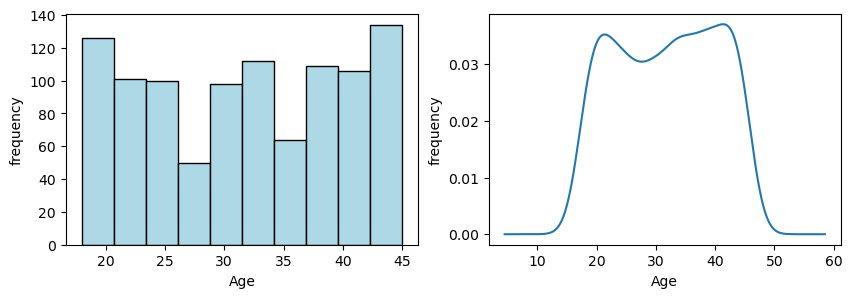

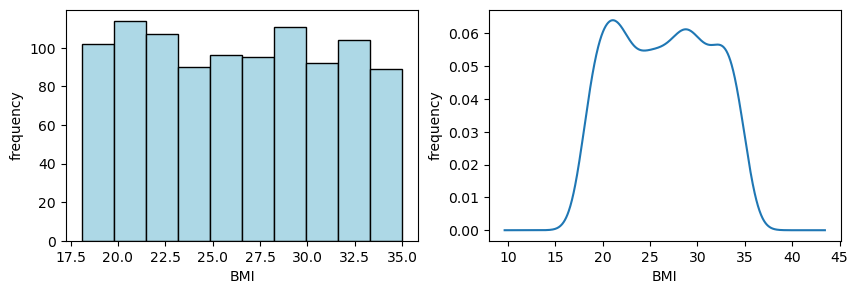

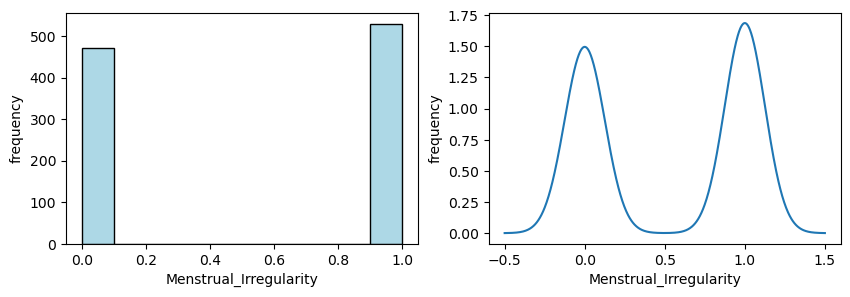

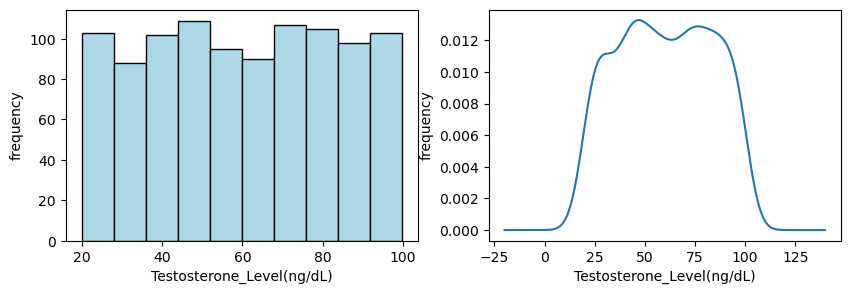

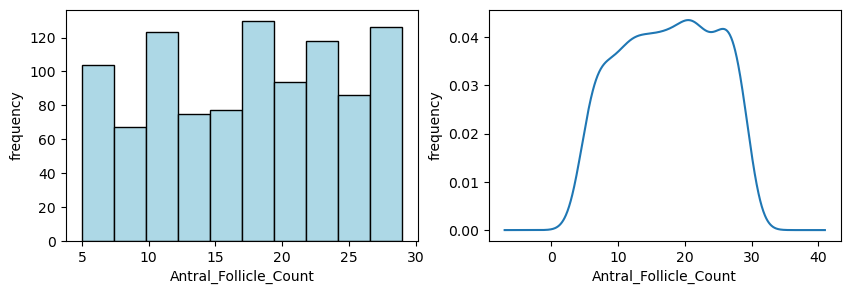

In [12]:
for i in features:
    plt.figure(figsize=(10,3))
    plt.subplot(1, 2, 1)
    pcos_dataset[i].plot(kind='hist', color='lightblue', edgecolor='black')
    plt.ylabel('frequency')
    plt.xlabel(i)

    plt.subplot(1, 2, 2)
    pcos_dataset[i].plot(kind='kde')
    plt.ylabel('frequency')
    plt.xlabel(i)


<Axes: ylabel='count'>

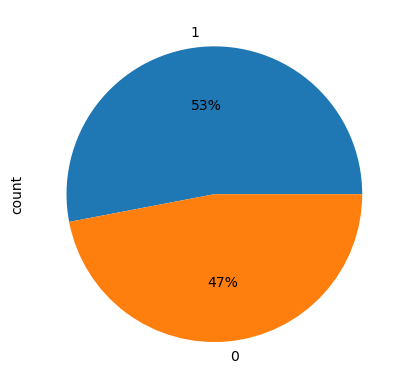

In [15]:
pcos_dataset['Menstrual_Irregularity'].value_counts().plot(kind='pie',autopct='%1.0f%%')

<Axes: xlabel='PCOS_Diagnosis', ylabel='Age'>

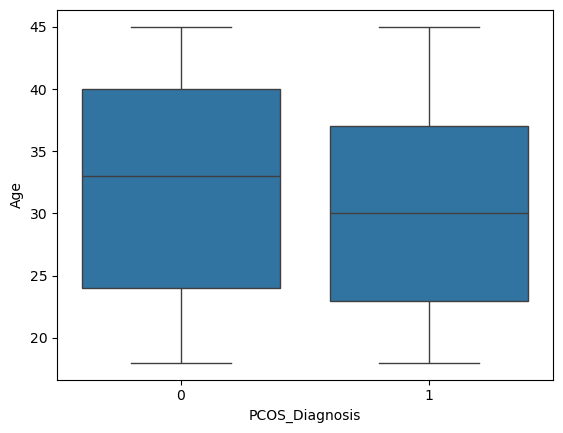

In [20]:
sns.boxplot(x='PCOS_Diagnosis', y='Age', data=pcos_dataset)

In [33]:
# bmi_mean = pcos_dataset['BMI'].mean()
bmi_mean = pcos_dataset.groupby('PCOS_Diagnosis')['BMI'].mean()
bmi_mean

PCOS_Diagnosis
0    25.457928
1    30.126633
Name: BMI, dtype: float64

<Axes: xlabel='PCOS_Diagnosis', ylabel='BMI'>

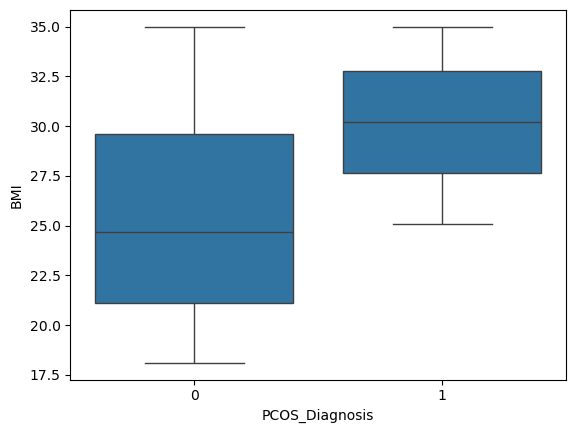

In [27]:
sns.boxplot(x='PCOS_Diagnosis', y='BMI', data=pcos_dataset)

In [32]:
'''
No one with regular periods has PCOS in this dataset.
331 people have menstrual irregularities but do not have PCOS.
199 people have menstrual irregularities and PCOS.
This suggests that regular periods are common among those without PCOS
'''
pd.crosstab(pcos_dataset['Menstrual_Irregularity'], pcos_dataset['PCOS_Diagnosis'])

PCOS_Diagnosis,0,1
Menstrual_Irregularity,,
0,470,0
1,331,199


<Axes: xlabel='PCOS_Diagnosis', ylabel='Testosterone_Level(ng/dL)'>

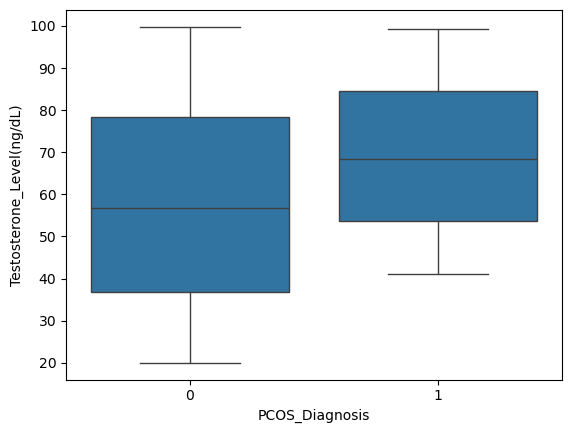

In [34]:
sns.boxplot(x='PCOS_Diagnosis', y='Testosterone_Level(ng/dL)', data=pcos_dataset)

In [36]:
T_mean=pcos_dataset.groupby('PCOS_Diagnosis')['Testosterone_Level(ng/dL)'].mean()
T_mean

PCOS_Diagnosis
0    57.842447
1    69.485930
Name: Testosterone_Level(ng/dL), dtype: float64

<Axes: xlabel='PCOS_Diagnosis', ylabel='Antral_Follicle_Count'>

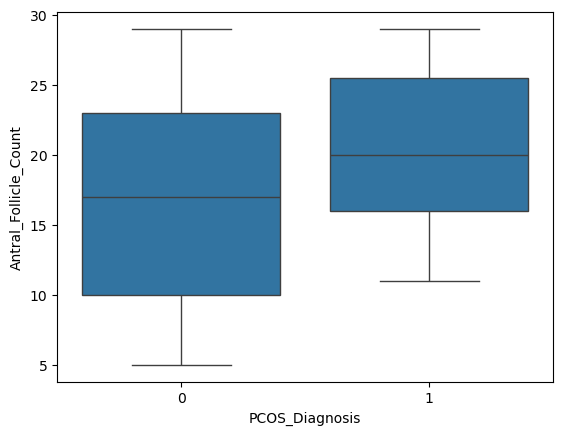

In [37]:
sns.boxplot(x='PCOS_Diagnosis', y='Antral_Follicle_Count', data=pcos_dataset)

In [39]:
'''
The antral follicle count (AFC) is a non-invasive test used to assess a woman's ovarian reserve - the number of eggs contained in her ovaries at any given time.
A healthy female ovaries has about 8 to 24 follicles (both ovaries combined) .
If a female has ≥ 20 follicles per ovary, it is suggestive of PCOS, which is also supported by the boxplot, showing that the mean follicle count for girls with PCOS is
20.
'''
AFC_mean=pcos_dataset.groupby('PCOS_Diagnosis')['Antral_Follicle_Count'].mean()
AFC_mean

PCOS_Diagnosis
0    16.792759
1    20.190955
Name: Antral_Follicle_Count, dtype: float64

In [41]:
df_corr = pcos_dataset.corr()
df_corr

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
Age,1.000000,-0.049455,0.032300,-0.050129,0.017841,-0.064675
BMI,-0.049455,1.000000,0.031189,0.003811,0.030724,0.377852
Menstrual_Irregularity,0.032300,0.031189,1.000000,0.042694,0.035851,0.469376
Testosterone_Level(ng/dL),-0.050129,0.003811,0.042694,1.000000,0.011976,0.200817
Antral_Follicle_Count,0.017841,0.030724,0.035851,0.011976,1.000000,0.192014
PCOS_Diagnosis,-0.064675,0.377852,0.469376,0.200817,0.192014,1.000000


<Axes: >

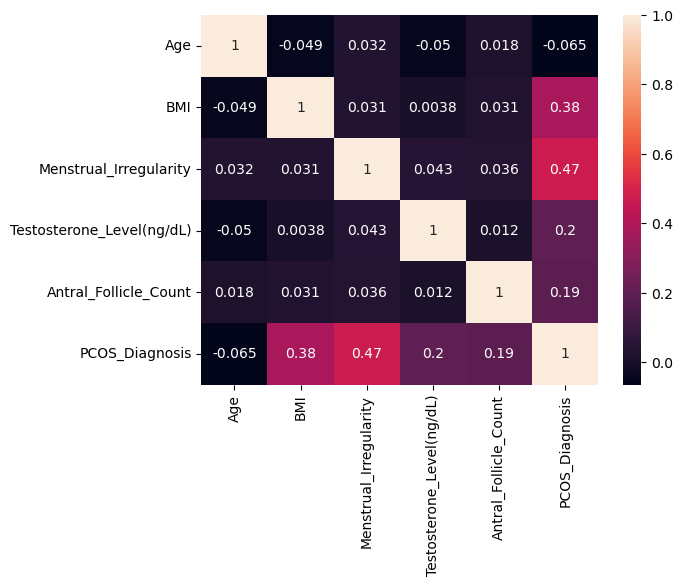

In [42]:
sns.heatmap(df_corr,annot=True)

In [36]:
min_max_scaler = MinMaxScaler()
pcos_scaled = min_max_scaler.fit_transform(pcos)
# pcos_scaled = min_max_scaler.fit_transform(pcos_dataset)

pcos_scaled

array([[0.92592593, 0.03550296, 1.        , 0.14160401, 0.70833333],
       [0.92592593, 0.0887574 , 0.        , 0.36090226, 0.04166667],
       [0.66666667, 0.23668639, 0.        , 0.04385965, 0.125     ],
       ...,
       [0.2962963 , 0.0887574 , 1.        , 0.60275689, 0.625     ],
       [0.33333333, 0.17751479, 0.        , 0.01879699, 0.875     ],
       [0.55555556, 0.66863905, 1.        , 0.30451128, 0.875     ]])

In [38]:
standardizer = StandardScaler()
pcos_standered = standardizer.fit_transform(pcos)

pcos_standered

array([[ 1.33544048, -1.5873654 ,  0.92761259, -1.23353925,  0.63451998],
       [ 1.33544048, -1.40290421, -1.07803625, -0.48614354, -1.61654868],
       [ 0.50771865, -0.89051202, -1.07803625, -1.5666642 , -1.3351651 ],
       ...,
       [-0.67474109, -1.40290421,  0.92761259,  0.33812716,  0.3531364 ],
       [-0.55649512, -1.0954689 , -1.07803625, -1.65208085,  1.19728714],
       [ 0.15298073,  0.6056732 ,  0.92761259, -0.67833101,  1.19728714]])

In [48]:
pcos_labels

# scale target value if needed, in this case it is currently in between 0 and 1. so scaling is not needed

# target_scaler = MinMaxScaler()
# scaled_pcos_labels = target_scaler.fit_transform(pcos_labels.to_frame())
#
# scaled_pcos_labels

29     0
535    0
695    0
557    1
836    0
      ..
106    0
270    0
860    0
435    0
102    1
Name: PCOS_Diagnosis, Length: 800, dtype: int64

In [63]:
print(pcos[['Menstrual_Irregularity']].iloc[:5], '\n\n', pcos_labels.iloc[:5])

     Menstrual_Irregularity
29                        1
535                       0
695                       0
557                       1
836                       1 

 29     0
535    0
695    0
557    1
836    0
Name: PCOS_Diagnosis, dtype: int64


In [64]:
# first use linear regression on it

linear_regression = LinearRegression()
linear_regression.fit(pcos[['Menstrual_Irregularity']], pcos_labels)
fake_new_data = pcos[['Menstrual_Irregularity']].iloc[:5]

scaled_predictions = linear_regression.predict(fake_new_data)
scaled_predictions

array([3.72093023e-01, 2.77555756e-17, 2.77555756e-17, 3.72093023e-01,
       3.72093023e-01])

In [52]:
# useless for this scenario

# predictions = target_scaler.inverse_transform(scaled_predictions)
# predictions

In [52]:
# train model using logistic regression
pcos_test = pcos_test_set.drop('PCOS_Diagnosis', axis=1)
pcos_test_labels = pcos_test_set['PCOS_Diagnosis'].copy()

logistic_regression = LogisticRegression()
logistic_regression.fit(pcos, pcos_labels)

# fake_new_data = pcos.iloc[:5]

y_hat_log = logistic_regression.predict(pcos_test)
y_hat_log

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1])

In [53]:
# accuracy of predictions based on logistic regression
accuracy_score(pcos_test_labels, y_hat_log)

0.885

In [64]:
cv = cross_val_score(logistic_regression, X, target, cv=5, scoring='accuracy')
cv

array([0.915, 0.895, 0.93 , 0.89 , 0.94 ])

In [67]:
cv.mean()

np.float64(0.914)

In [70]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(pcos, pcos_labels)
y_hat_tree = decision_tree.predict(pcos_test)
y_hat_tree

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1])

In [72]:
# accuracy of predictions based on logistic regression
accuracy_score(pcos_test_labels, y_hat_tree)

0.995

[Text(0.2857142857142857, 0.9, 'x[2] <= 0.5\ngini = 0.32\nsamples = 800\nvalue = [640, 160]\nclass = 0'),
 Text(0.14285714285714285, 0.7, 'gini = 0.0\nsamples = 370\nvalue = [370, 0]\nclass = 0'),
 Text(0.21428571428571427, 0.8, 'True  '),
 Text(0.42857142857142855, 0.7, 'x[1] <= 25.15\ngini = 0.467\nsamples = 430\nvalue = [270, 160]\nclass = 0'),
 Text(0.3571428571428571, 0.8, '  False'),
 Text(0.2857142857142857, 0.5, 'gini = 0.0\nsamples = 179\nvalue = [179, 0]\nclass = 0'),
 Text(0.5714285714285714, 0.5, 'x[3] <= 41.15\ngini = 0.462\nsamples = 251\nvalue = [91, 160]\nclass = 1'),
 Text(0.42857142857142855, 0.3, 'gini = 0.0\nsamples = 58\nvalue = [58, 0]\nclass = 0'),
 Text(0.7142857142857143, 0.3, 'x[4] <= 10.5\ngini = 0.283\nsamples = 193\nvalue = [33, 160]\nclass = 1'),
 Text(0.5714285714285714, 0.1, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]\nclass = 0'),
 Text(0.8571428571428571, 0.1, 'gini = 0.0\nsamples = 160\nvalue = [0, 160]\nclass = 1')]

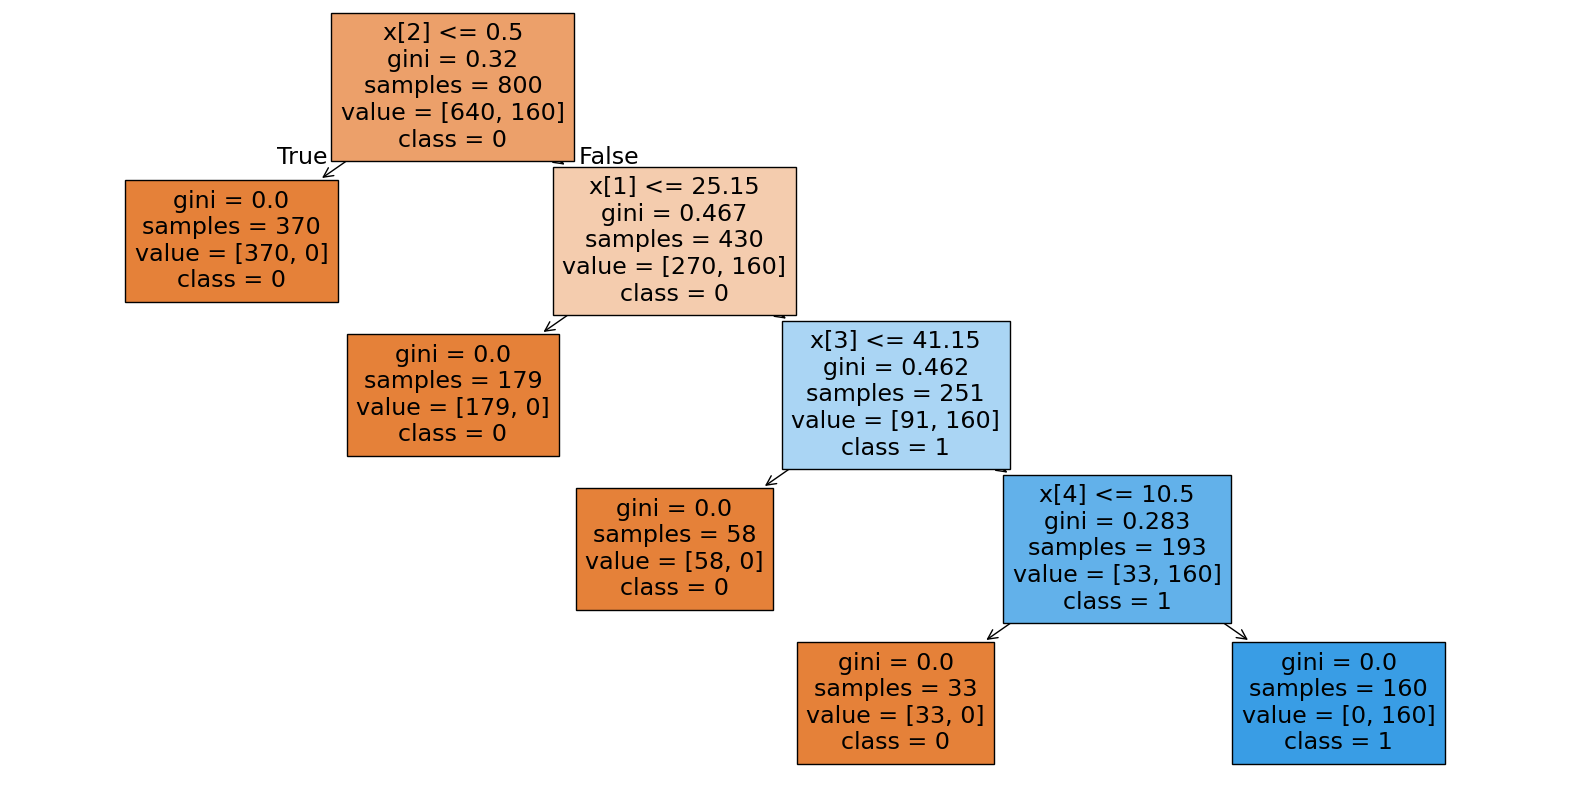

In [83]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))

plot_tree(decision_tree, filled=True, class_names=[str(i) for i in np.unique(pcos_dataset['PCOS_Diagnosis'])])